In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import math

In [2]:
def getImage1(imgName): #For the first image folder
    img_dir = "sample_images1" # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*')
    img_files = glob.glob(data_path)
    readImg = img_dir + "/" + imgName
    img = cv2.imread(readImg,0)
    return img

def getImage2(imgName): #For the second image folder
    img_dir = "sample_images2" # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*')
    img_files = glob.glob(data_path)
    readImg = img_dir + "/" + imgName
    img = cv2.imread(readImg,0)
    return img

In [3]:
def applyConvolution(image, kernel):
    img_h, img_w = image.shape
    filter_size = kernel.shape[0]

    padding = int((kernel.shape[0]-1)/2)
    padding_add = int(padding*2)
    input_image_with_padding = np.zeros([image.shape[0]+padding_add, image.shape[1]+padding_add])
    input_image_with_padding[padding:img_h+padding, padding:img_w+padding] = image[:,:]

    flip_filter = cv2.flip(kernel, -1)

    output_img = np.zeros(image.shape, dtype=image.dtype)

    for i in range(img_h):
        for j in range(img_w):
            temp = input_image_with_padding[i:i+filter_size, j:j+filter_size]
            output_img[i,j] = np.uint8(np.sum(np.double(temp)*np.double(flip_filter)))

    return output_img

In [4]:
#Filters to take derivative of an image and sobel filters
hx = np.array([
        [0,0,0], 
        [1,-1,0], 
        [0,0,0]
    ])

hy = np.array([
        [0,0,0], 
        [0,-1,0], 
        [0,1,0]
    ])
sobel_x = np.array([
        [-1,0,1], 
        [-2,0,2], 
        [-1,0,1]
    ])
sobel_y = np.array([
        [1,2,1], 
        [0,0,0], 
        [-1,-2,-1]
    ])

In [17]:
#picture containers
images_1 = []
hx_pics = []
hy_pics = []
h_gradients = []
sobelx_pics = []
sobely_pics = []
sobel_gradients = []

#read pictures
zebra2 = getImage1("zebra2.jpg")
lion2 = getImage1("lion2.jpg")
baboon = getImage1("Baboon.bmp")
images_1.append(zebra2)
images_1.append(lion2)
images_1.append(baboon)

#Take x derivatives and y derivatives of images and take gradient
for i in range(3):
    img_hx = applyConvolution(images_1[i],hx)
    hx_pics.append(img_hx)
    img_hy = applyConvolution(images_1[i],hy)
    hy_pics.append(img_hy)
    #gradient operations
    img_gradient = np.sqrt(hx_pics[i]*hx_pics[i] + hy_pics[i]*hy_pics[i])
    img_gradient = img_gradient.astype(np.uint8)
    h_gradients.append(img_gradient)
    

#Take x derivatives and y derivatives of images and take gradient with SOBEL FILTERS
for i in range(3):
    img_sx = applyConvolution(images_1[i],sobel_x)
    sobelx_pics.append(img_sx)
    img_sy = applyConvolution(images_1[i],sobel_y)
    sobely_pics.append(img_sy)
    #gradient operations
    sobel_gradient = np.sqrt(sobelx_pics[i]*sobelx_pics[i] + sobely_pics[i]*sobely_pics[i])
    sobel_gradient = sobel_gradient.astype(np.uint8)
    sobel_gradients.append(sobel_gradient)

'''
for i in range(3):
    cv2.imwrite("pictures/hx"+str(i)+".jpg",hx_pics[i])
    cv2.imwrite("pictures/hy"+str(i)+".jpg",hy_pics[i])
    cv2.imwrite("pictures/gradient"+str(i)+".jpg",h_gradients[i])
    cv2.imwrite("pictures/sobelx"+str(i)+".jpg",sobelx_pics[i])
    cv2.imwrite("pictures/sobely"+str(i)+".jpg",sobely_pics[i])
    cv2.imwrite("pictures/sobel_gradient"+str(i)+".jpg",sobel_gradients[i])
'''

'\nfor i in range(3):\n    cv2.imwrite("pictures/hx"+str(i)+".jpg",hx_pics[i])\n    cv2.imwrite("pictures/hy"+str(i)+".jpg",hy_pics[i])\n    cv2.imwrite("pictures/gradient"+str(i)+".jpg",h_gradients[i])\n    cv2.imwrite("pictures/sobelx"+str(i)+".jpg",sobelx_pics[i])\n    cv2.imwrite("pictures/sobely"+str(i)+".jpg",sobely_pics[i])\n    cv2.imwrite("pictures/sobel_gradient"+str(i)+".jpg",sobel_gradients[i])\n'

In [18]:
#Slide show for x,y,sobel_x,sobel_y derivatives gradient of images
for i in range(3):
    cv2.imshow("IMG-HX-HY-GRADIENT",np.hstack((images_1[i],hx_pics[i],hy_pics[i],h_gradients[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imshow("IMG-SobelX-SobelY-GRADIENT",np.hstack((images_1[i],sobelx_pics[i],sobely_pics[i],sobel_gradients[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

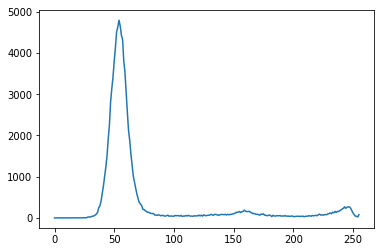

In [5]:
#HISTOGRAM
grayImage = getImage2("grayImage.jpg")
pixel_count = np.zeros([256],dtype = int)
for i in range(len(grayImage)):
    for j in range(len(grayImage.T)):
        pixel_count[grayImage[i][j]] = pixel_count[grayImage[i][j]]+1


x = range(256)
plt.plot(x,pixel_count)

In [6]:
#Giving threshold manually
def drawBinaryImage(image,threshold):
    new_img = np.zeros(image.shape, dtype= np.uint8)
    img_h, img_w = image.shape
    for i in range(img_h):
        for j in range(img_w):
            if image[i][j] >= threshold:
                new_img[i][j] = 255
    return new_img

In [7]:
#binary images with different thresholds 
threshold = []


threshold50 = drawBinaryImage(grayImage,50)
threshold55 = drawBinaryImage(grayImage,55)
threshold60 = drawBinaryImage(grayImage,60)
threshold65 = drawBinaryImage(grayImage,65)
threshold70 = drawBinaryImage(grayImage,70)
threshold71 = drawBinaryImage(grayImage,71)
threshold72 = drawBinaryImage(grayImage,72)
threshold73 = drawBinaryImage(grayImage,73)
threshold74 = drawBinaryImage(grayImage,74)
threshold75 = drawBinaryImage(grayImage,75)
threshold100 = drawBinaryImage(grayImage,100)
threshold125 = drawBinaryImage(grayImage,125)
threshold150 = drawBinaryImage(grayImage,150)
threshold175 = drawBinaryImage(grayImage,175)
threshold200 = drawBinaryImage(grayImage,200)
threshold225 = drawBinaryImage(grayImage,225)
threshold250 = drawBinaryImage(grayImage,250)

threshold.append(threshold50)
threshold.append(threshold55)
threshold.append(threshold60)
threshold.append(threshold65)
threshold.append(threshold70)
threshold.append(threshold71)
threshold.append(threshold72)
threshold.append(threshold73)
threshold.append(threshold74)
threshold.append(threshold75)
threshold.append(threshold100)
threshold.append(threshold125)
threshold.append(threshold150)
threshold.append(threshold175)
threshold.append(threshold200)
threshold.append(threshold225)
threshold.append(threshold250)

'''
for i in range(len(threshold)):
    cv2.imwrite("test/threshold[" + str(i) + "].jpg",threshold[i])
'''


In [8]:
#Slide show for binary images with different thresholds
for i in range(len(threshold)):
    cv2.imshow("imgs with different thresholds",threshold[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

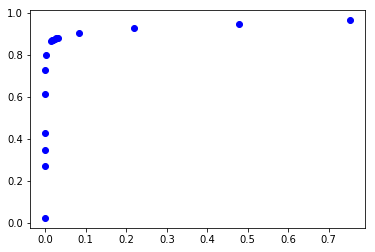

In [8]:
#Drawing ROC Curve
ground_truth = getImage2("ground_truth.png")
img_h, img_w = ground_truth.shape 


y_axis = []
x_axis = []

for t in range(len(threshold)):
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    thres = threshold[t]
    for i in range(img_h):
        for j in range(img_w):
            if ground_truth[i][j] == thres[i][j]:
                if thres[i][j]==0:
                    true_neg += 1
                else:
                    true_pos += 1
            else:
                if thres[i][j]==0:
                    false_neg += 1
                else:
                    false_pos += 1
    y_axis.append(true_pos/(true_pos+false_neg))
    x_axis.append(false_pos/(false_pos+true_neg))
plt.plot(x_axis,y_axis,"bo")
plt.show()

In [9]:
#QUESTION 4, Choosing best threshold with Pathagoras theorem.
#1-sensitiviy = 1-y_axis values
#1-specifiy = x_axis values

#just for initialization
smallest_dist = math.sqrt((1-y_axis[0])*(1-y_axis[0])+(x_axis[0])*(x_axis[0]))
optimal_index = 0 #will hold the best threshold index after calculating distances

for i in range(1,len(x_axis)):
    a = 1-y_axis[i]
    b = x_axis[i]
    distance = math.sqrt(a*a + b*b)
    if (distance < smallest_dist):
        smallest_dist = distance
        optimal_index = i
    
print("Picture with optimal threshold is at threshold array[{}] ".format(optimal_index))


Picture with optimal threshold is at threshold array[4] 
